In [1]:
# Need a create_wavetable function - probably gonna take most from GitHub thing bc why not
import numpy as np
from scipy.io.wavfile import write

In [2]:
#this creates a one cycle loop with any function
def create_wavetable(func, len, init_phase):
    wavetable = np.zeros((len,))
    for i in range(len):
        wavetable[i] = func(
            2*np.pi*i/len +
            2*np.pi*init_phase #this should be between 0 and 1, putting 1/2 is like pi because 2pi*phase
            )
    return wavetable

In [3]:
sin = create_wavetable(np.sin, 512,0)

In [4]:
import matplotlib.pyplot as plt

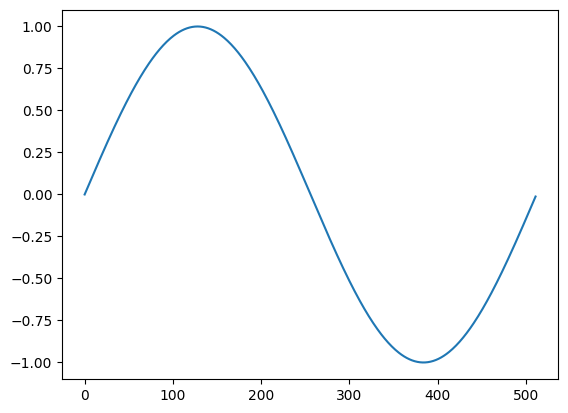

In [5]:
plt.plot(sin)

In [22]:
class Wavetable_Oscillator:
    def __init__(self, wavetable, freq, amp, sr, duration):
        self.wavetable=wavetable
        self.freq=freq
        self.amp=amp
        self.sr=sr
        self.duration = duration

        self.wavetable_len=np.shape(self.wavetable)[0]
        self.index_incremenent=self.wavetable_len*self.freq/self.sr

        self.data = self.sound_gen()
        
    #too dumb for this
    #@property
    #def freq(self):
    #    return self.freq

    #@freq.setter
    #def set_freq(self, freq):
    #    self.freq=freq
    #    self.index_increment=self.wavetable_len*self.freq/self.sr

    def get_sample(self, ix):
        
        
        #figure out to do w/ numpy - should be very easy
        value_low = self.wavetable[int(np.floor(ix)) % self.wavetable_len]
        value_high = self.wavetable[int(np.ceil(ix)) % self.wavetable_len] 

        value = (value_low+value_high)/2

        return value

    def sound_gen(self):
        output_len = self.sr*self.duration
        output = np.zeros(output_len)
        
        ix = 0

        for i in range(output_len):
            output[i]=self.get_sample(ix)
            ix+=self.index_incremenent 
        
        output = self.amp * output

        return output
def write_to_sound(path,sr,output):
    write(path, rate=sr, data=output)

In [23]:
wavetable = create_wavetable(np.sin,512,0)
osc = Wavetable_Oscillator(wavetable,440,1,44100,1)
write_to_sound('audio/osc_test2.wav', 44100, sin)